# Telco Customer Churn Prediction

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from xgboost import XGBClassifier

In [22]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Data

In [50]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternet
2174,1178-PZGAB,Female,0,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0,0
6504,6110-OHIHY,Male,0,No,No,3,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,No,Electronic check,79.25,267.6,1,1
5930,8398-TBIYD,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Two year,Yes,Bank transfer (automatic),84.70,6185.15,0,1
842,1038-ZAGBI,Female,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,229.6,1,0
6756,1754-GKYPY,Male,1,Yes,No,22,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),89.75,1938.9,0,1
273,4716-HHKQH,Male,1,Yes,No,20,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,No,Electronic check,107.05,2172.05,0,1
1587,5939-SXWHM,Male,0,Yes,Yes,48,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.30,1245.05,0,0
2309,5414-OFQCB,Male,0,No,No,57,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Two year,Yes,Credit card (automatic),90.45,5229.8,0,1
4806,6729-FZWSY,Male,0,No,No,67,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,1195.95,0,0
5510,6693-FRIRW,Male,0,No,No,18,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,No,Credit card (automatic),101.30,1794.65,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data Cleaning

In [26]:
print(df['gender'].unique())

['Female' 'Male']


In [27]:
# transform target value 
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [49]:
# Neue Spalte hinzufügen
df['HasInternet'] = df['InternetService'].apply(lambda x: 0 if x == 'No' else 1)

## Data Exploration

In [37]:
# Kündigungsverteilung
print(y.value_counts(normalize=True))

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


### Gender

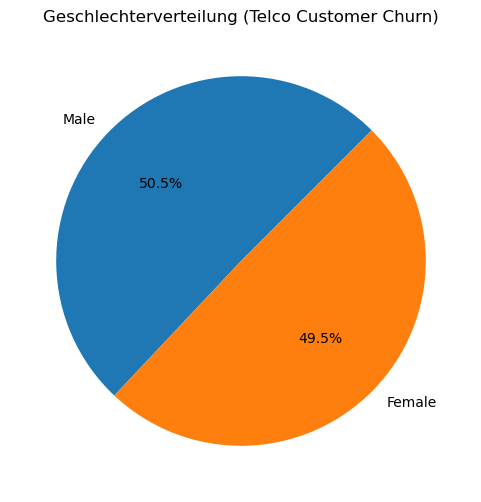

In [28]:
# Geschlechter zählen
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Geschlechterverteilung (Telco Customer Churn)')
plt.show()

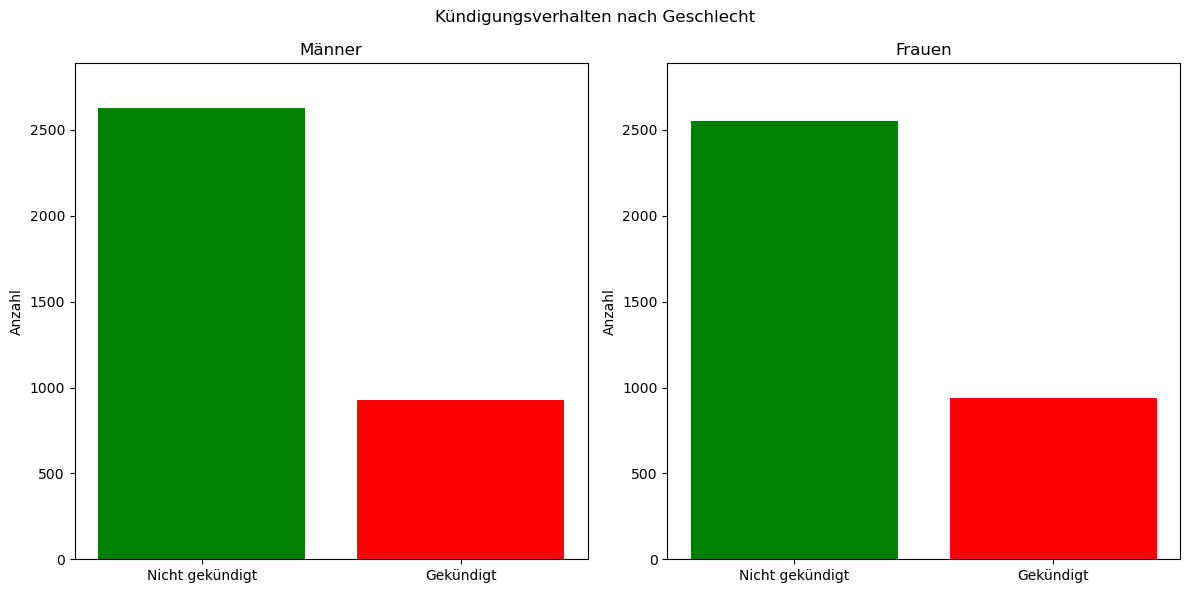

In [29]:
male_churn = df[df['gender'] == 'Male']['Churn'].value_counts()
female_churn = df[df['gender'] == 'Female']['Churn'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Männer
axes[0].bar(['Nicht gekündigt', 'Gekündigt'], male_churn.values, color=['green', 'red'])
axes[0].set_title('Männer')
axes[0].set_ylabel('Anzahl')
axes[0].set_ylim(0, max(male_churn.max(), female_churn.max()) * 1.1)

# Frauen
axes[1].bar(['Nicht gekündigt', 'Gekündigt'], female_churn.values, color=['green', 'red'])
axes[1].set_title('Frauen')
axes[1].set_ylabel('Anzahl')
axes[1].set_ylim(0, max(male_churn.max(), female_churn.max()) * 1.1)

plt.suptitle('Kündigungsverhalten nach Geschlecht')
plt.tight_layout()
plt.show()

### Dauer

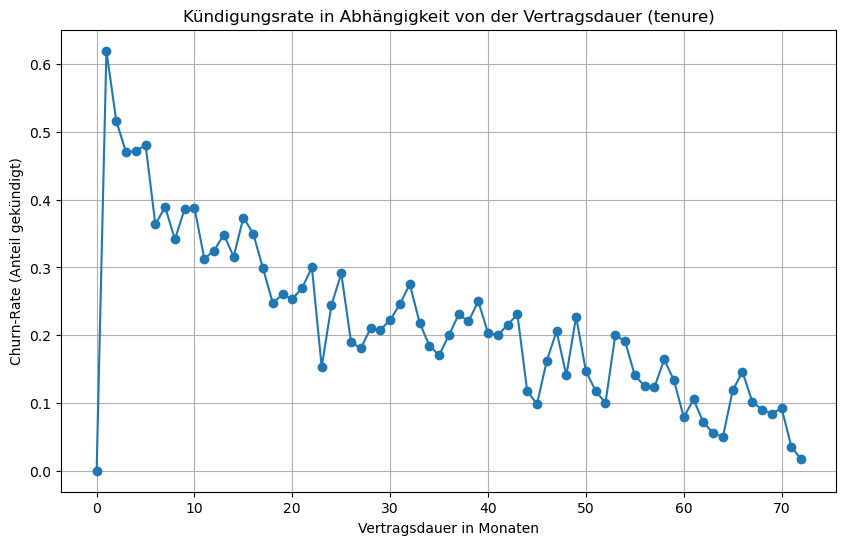

In [30]:
tenure_churn = df.groupby('tenure')['Churn'].mean()

plt.figure(figsize=(10, 6))
plt.plot(tenure_churn.index, tenure_churn.values, marker='o')
plt.title('Kündigungsrate in Abhängigkeit von der Vertragsdauer (tenure)')
plt.xlabel('Vertragsdauer in Monaten')
plt.ylabel('Churn-Rate (Anteil gekündigt)')
plt.grid(True)
plt.show()

In [31]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


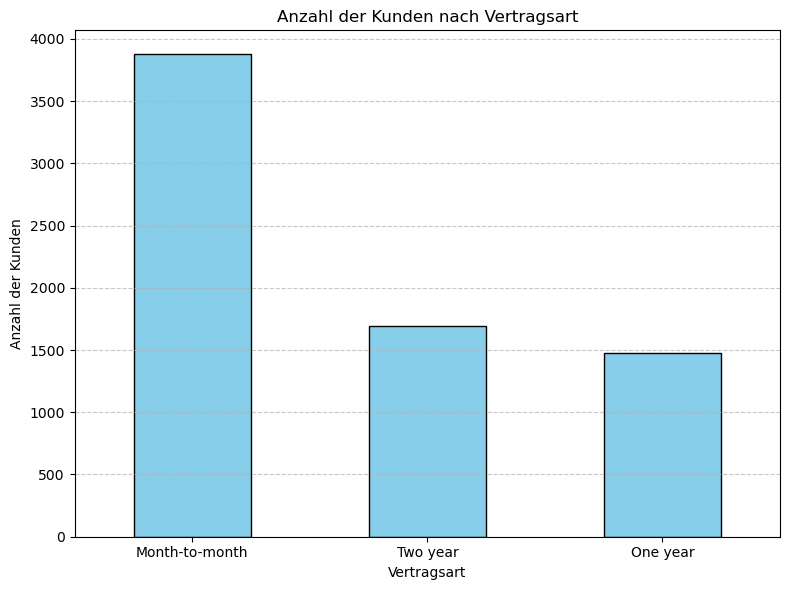

In [32]:
#print(df['Contract'].unique())

contract_counts = df['Contract'].value_counts()

plt.figure(figsize=(8, 6))
contract_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Anzahl der Kunden nach Vertragsart')
plt.xlabel('Vertragsart')
plt.ylabel('Anzahl der Kunden')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

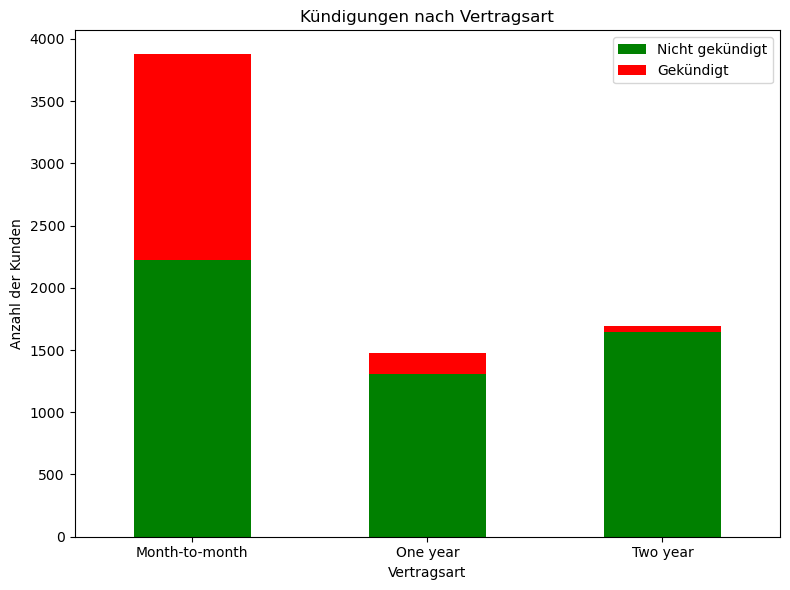

In [34]:
# Gruppiere nach Vertragsart und Kündigung
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Balkendiagramm
contract_churn_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])
plt.title('Kündigungen nach Vertragsart')
plt.xlabel('Vertragsart')
plt.ylabel('Anzahl der Kunden')
plt.legend(['Nicht gekündigt', 'Gekündigt'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## ML Model

In [ ]:
y = df['Churn']
df = df.drop(columns=['customerID', 'Churn'])

In [55]:
# One-Hot-Encoding
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [56]:
# 80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

ROC AUC: 0.8400707845720632


In [17]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[918 117]
 [172 202]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



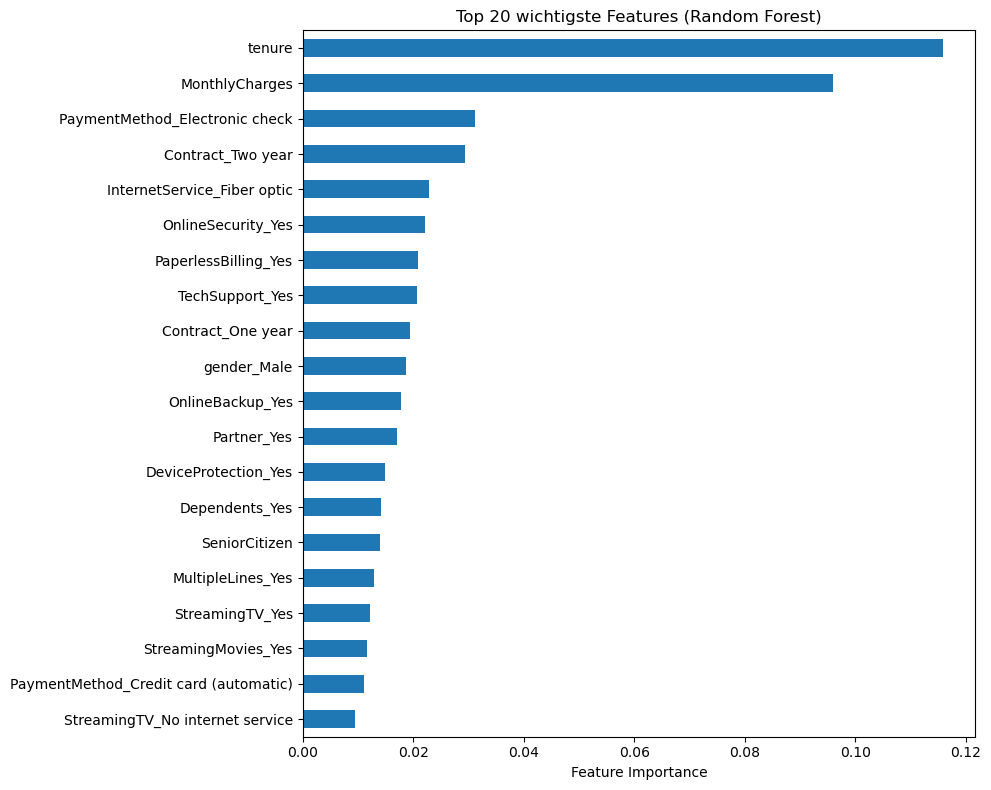

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importances extrahieren
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Visualisierung
plt.figure(figsize=(10, 8))
importances.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 wichtigste Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

In [59]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [60]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

In [61]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

In [62]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.7s
[CV] END ma

In [63]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Beste Parameter:", grid_search.best_params_)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Beste Parameter: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409

ROC AUC: 0.8320597277119015


In [65]:
# scale_pos_weight = Verhältnis negatives zu positives Label
neg, pos = y_train.value_counts()
scale = neg / pos

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale,  # gegen Ungleichgewicht
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [66]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

/Users/mertakdemir/Downloads/HA_2/ENTER/envs/ml_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:23:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1035
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409

ROC AUC: 0.8318582241855899


In [67]:
# XGBoost Tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [68]:
neg, pos = y_train.value_counts()
scale = neg / pos  # für Imbalance

xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [69]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Users/mertakdemir/Downloads/HA_2/ENTER/envs/ml_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:25:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mertakdemir/Downloads/HA_2/ENTER/envs/ml_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:25:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mertakdemir/Downloads/HA_2/ENTER/envs/ml_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:25:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mertakdemir/Downloads/HA_2/ENTER/envs/ml_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:25:23] 

In [70]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Beste Parameter:", grid_search.best_params_)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Beste Parameter: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.51      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409

ROC AUC: 0.8455204216073782
